## Fraud Detection
### By going throught the data I a have created certain definition of fraudulent users
<ol>The users who have no records of calls or messages but have record of serach</ol>
<ol>The users who is Disproportionation ration between searches and call+messages</ol>

In [79]:
import pandas as pd
from tqdm import tqdm as tq
from sklearn.preprocessing import MinMaxScaler
from swifter import swifter

In [80]:
import sklearn
import swifter as sw
import tqdm

In [82]:
print(f"""
     version of pandas: {pd.__version__}
     version of tqdm: {tqdm.__version__}
     version of sklearn: {sklearn.__version__}
     version of swifter: {sw.__version__}
""")


     version of pandas: 1.2.4
     version of tqdm: 4.59.0
     version of sklearn: 0.24.1
     version of swifter: 1.0.9



In [5]:
data_message=pd.read_csv('message_data.csv', sep='\t')
data_call = pd.read_csv('call_data.csv', sep='\t')
data_search = pd.read_csv('search_data.csv', sep='\t')
data_signup = pd.read_csv('signup_data.csv', sep='\t')

In [6]:
display(data_message)
display(data_call)
display(data_search)
display(data_signup)

,user_id,message_ts
0,10024239,1553986083696
1,10021388,1553197787973
2,10022286,1552931128388
3,10023459,1553519190682
4,10023112,1553967251566
...,...,...
105780,10020758,1552268924876
105781,10003523,1554156156116
105782,10013994,1553276090999
105783,10025855,1551625310618


,user_id,call_ts
0,10016547,1554294993128
1,10022130,1553790875089
2,10020436,1553083077679
3,10004031,1553984897628
4,10001845,1553445030753
...,...,...
1223790,10019643,1553895702139
1223791,10022738,1552072391718
1223792,10018307,1554055713419
1223793,10005060,1553458349137


,user_id,search_ts
0,10001110,1554188089059
1,10001010,1553159392120
2,10018492,1554296508598
3,10008817,1553186210012
4,10015005,1554189287541
...,...,...
867126,10016290,1551969062049
867127,10025816,1553503775585
867128,10005163,1552502791392
867129,10016659,1554216761881


,user_id,country_code,signup_ts
0,10000000,IT,1552867200000
1,10000001,IT,1551571200000
2,10000002,SE,1554163200000
3,10000003,IT,1553644800000
4,10000004,IT,1554076800000
...,...,...,...
25995,10025995,SE,1554076800000
25996,10025996,SE,1554163200000
25997,10025997,IT,1553644800000
25998,10025998,IT,1553472000000


### First step will be to convert this data into more readable format 

In [7]:
convert_ms = lambda x: pd.to_datetime(x, unit='ms')

In [8]:
data_message['message_ts'] = data_message['message_ts'].swifter.apply(convert_ms)

In [9]:
data_call['call_ts'] = data_call['call_ts'].swifter.apply(convert_ms)
data_search['search_ts'] = data_search['search_ts'].swifter.apply(convert_ms)
data_signup['signup_ts'] = data_signup['signup_ts'].swifter.apply(convert_ms)

#### Let's see the country wise distribution

Text(0.5, 1.0, 'Country Wise distribution')

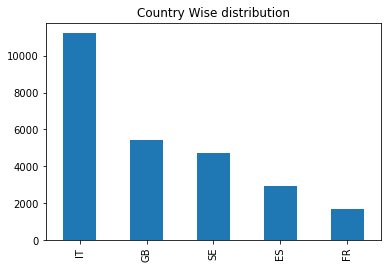

In [77]:
data_signup.country_code.value_counts().plot.bar().set_title('Country Wise distribution')

Text(0.5, 1.0, 'Country Code')

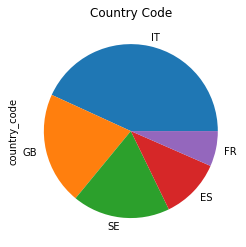

In [76]:
data_signup.country_code.value_counts().plot.pie().set_title('Country Code')

### Let's perform some sanity checks and see that all of the id which have signed up are present in the message, search and call tables

In [12]:
data_signup.duplicated(subset=['user_id']).sum()

0

In [13]:
master_id_set = set(data_signup.user_id)

In [14]:
set(data_call.user_id).issubset(master_id_set)

True

In [15]:
set(data_message.user_id).issubset(master_id_set)

True

In [16]:
set(data_search.user_id).issubset(master_id_set)

True

In [17]:
master_id_set.issubset(set(data_search.user_id))

True

### we can now cleary see that the all of the id which are present in the signup dataset are present in all of the other dataset 

In [18]:
messages_counts = data_message.user_id.value_counts()
call_counts = data_call.user_id.value_counts()
search_counts = data_search.user_id.value_counts()

In [193]:
final_table = []
for id in tq(master_id_set):
    final_dict = {}
    final_dict['id'] = id
    final_dict['country'] = data_signup[data_signup.user_id==id]['country_code']
    final_dict['signup_date'] = data_signup[data_signup.user_id==id]['signup_ts']
    
    if id in set(data_message.user_id):
        final_dict['message_count'] = messages_counts[id]
    else:
        final_dict['message_count'] = 0
    
    if id in set(data_call.user_id):
        final_dict['call_count'] = call_counts[id]
    else:
        final_dict['call_count'] = 0
    
    if id in set(data_search.user_id):
        final_dict['search_count'] = search_counts[id]
    else:
        final_dict['search_count'] = 0
    final_table.append(final_dict)
    

100%|██████████████████████████████████████████████████████████████████████████| 26000/26000 [1:32:15<00:00,  4.70it/s]


In [194]:
Master = pd.DataFrame(final_table)

#### I  did small mistake in the data prepration so correcting it here 

In [240]:
Master['country'] = Master['country'].apply(lambda x:x.values[0])

In [243]:
Master['signup_date'] = Master['signup_date'].apply(lambda x:x.values[0])

In [244]:
Master

,id,country,signup_date,message_count,call_count,search_count
0,10000000,IT,2019-03-18,1,36,16
1,10000001,IT,2019-03-03,0,64,20
2,10000002,SE,2019-04-02,2,5,17
3,10000003,IT,2019-03-27,0,60,38
4,10000004,IT,2019-04-01,0,24,37
...,...,...,...,...,...,...
25995,10025995,SE,2019-04-01,0,14,14
25996,10025996,SE,2019-04-02,0,34,6
25997,10025997,IT,2019-03-27,1,85,29
25998,10025998,IT,2019-03-25,3,16,28


In [245]:
Master.to_csv('Master.csv')

In [19]:
Master = pd.read_csv('Master.csv').drop(['Unnamed: 0'], axis=1)

### This is the main aggregation dataset which basically have all of the data of the ID w.r.t searches, calls and messages they have done

In [20]:
Master.head()

,id,country,signup_date,message_count,call_count,search_count
0,10000000,IT,2019-03-18,1,36,16
1,10000001,IT,2019-03-03,0,64,20
2,10000002,SE,2019-04-02,2,5,17
3,10000003,IT,2019-03-27,0,60,38
4,10000004,IT,2019-04-01,0,24,37


In [21]:
Master.signup_date = Master.signup_date.apply(pd.to_datetime)

<AxesSubplot:>

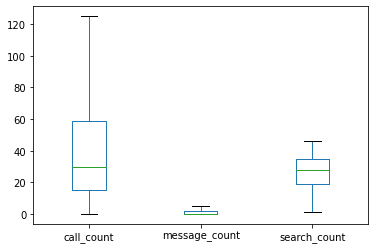

In [22]:
Master[['call_count', 'message_count', 'search_count']].plot.box(showfliers=False)

In [23]:
suspectes = Master[(Master.message_count==0)&(Master.call_count==0)]

In [24]:
suspectes.head()

,id,country,signup_date,message_count,call_count,search_count
39,10000039,ES,2019-03-30,0,0,30
69,10000069,IT,2019-03-18,0,0,17
92,10000092,ES,2019-03-07,0,0,30
128,10000128,IT,2019-03-19,0,0,26
133,10000133,ES,2019-03-16,0,0,30


<AxesSubplot:>

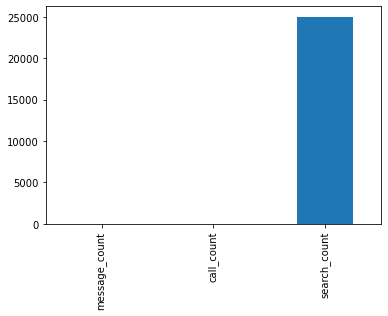

In [25]:
suspectes[['message_count','call_count', 'search_count']].sum(axis=0).plot.bar()

### From the above graphs we can see that there are approx 1000 id which have not received any message or call but they have search records, we will put these records in the suspect category and will investigate more on them later on, let's do more analysis to find more suspects from the Master dataset

In [26]:
Master2 = Master.copy()

In [27]:
Master2 = Master2[~((Master2.message_count==0)&(Master2.call_count==0))]

In [28]:
max_min = MinMaxScaler()

In [29]:
Master2.head()

,id,country,signup_date,message_count,call_count,search_count
0,10000000,IT,2019-03-18,1,36,16
1,10000001,IT,2019-03-03,0,64,20
2,10000002,SE,2019-04-02,2,5,17
3,10000003,IT,2019-03-27,0,60,38
4,10000004,IT,2019-04-01,0,24,37


In [30]:
normalized_data = max_min.fit_transform(Master2.iloc[:,3:].values)

In [31]:
Master2['message_normalized'] = normalized_data[:,0:1]

In [32]:
Master2['call_normalized'] = normalized_data[:,1:2]
Master2['search_normalized'] = normalized_data[:,2:3]

In [33]:
Master2['searc2callmessRatio'] = Master2['search_normalized']/(Master2['message_normalized']+Master2['call_normalized'])

In [34]:
Master2.searc2callmessRatio.describe()

count    25000.000000
mean         1.215377
std          9.311662
min          0.000000
25%          0.109823
50%          0.202044
75%          0.364865
max        665.115965
Name: searc2callmessRatio, dtype: float64

#### Now we have created an ration between the search and call+message, the basic idea is that if there amount of search is much higher than that of call or text we will be able to look that here and these users are showing bot like behaviour 

#### now we will use the ration to find out the users who have very high search hits but quite less call or message count 

In [35]:
suspectes2 = Master2[Master2.searc2callmessRatio>=Master2.searc2callmessRatio.quantile(q=.98)]

In [36]:
suspectes2

,id,country,signup_date,message_count,call_count,search_count,message_normalized,call_normalized,search_normalized,searc2callmessRatio
31,10000031,SE,2019-03-18,2,3,286,0.00102,0.001785,0.050613,18.046697
82,10000082,GB,2019-03-11,0,3,400,0.00000,0.001785,0.070858,39.703960
87,10000087,FR,2019-03-13,1,2,273,0.00051,0.001190,0.048304,28.418952
108,10000108,SE,2019-03-15,1,1,306,0.00051,0.000595,0.054164,49.025234
115,10000115,SE,2019-03-05,1,1,383,0.00051,0.000595,0.067839,61.402097
...,...,...,...,...,...,...,...,...,...,...
25825,10025825,IT,2019-03-17,1,3,288,0.00051,0.001785,0.050968,22.212127
25844,10025844,SE,2019-03-06,2,1,314,0.00102,0.000595,0.055585,34.422916
25909,10025909,IT,2019-03-11,0,2,408,0.00000,0.001190,0.072278,60.750044
25923,10025923,IT,2019-03-02,1,3,373,0.00051,0.001785,0.066063,28.790632


### Now we have 1500 suspected spammers now let us do more analysis on the same

#### if we have expanded the percentile and done more analysis we might be able to find more bot, but keeping the time constrain in mind I am moving ahead with 15000 possoble spammers

In [37]:
suspectes.search_count.describe()

count    1000.000000
mean       25.000000
std         5.934072
min         9.000000
25%        20.000000
50%        30.000000
75%        30.000000
max        35.000000
Name: search_count, dtype: float64

<AxesSubplot:>

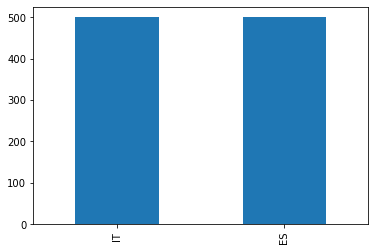

In [38]:
suspectes.country.value_counts().plot.bar()

In [39]:
total_it_cnt = data_signup.country_code.value_counts()['IT']
total_es_cnt = data_signup.country_code.value_counts()['ES']

<AxesSubplot:>

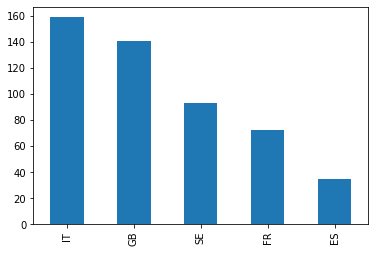

In [40]:
suspectes2.country.value_counts().plot.bar()

In [41]:
suspect_it_count = suspectes2.country.value_counts()['IT'] + suspectes.country.value_counts()['IT']
suspect_es_count = suspectes2.country.value_counts()['ES'] + suspectes.country.value_counts()['ES']
suspect_gb_count = suspectes2.country.value_counts()['GB']
suspect_se_count = suspectes2.country.value_counts()['SE']
suspect_fr_count = suspectes2.country.value_counts()['FR']

In [42]:
print(f"""

{round((suspect_it_count /total_it_cnt)*100,2)}% of total {total_it_cnt} i.e\
 {suspect_it_count} IT country numbers seems to be fradulent\n

{round((suspect_es_count /total_es_cnt)*100,2)}% of total {total_es_cnt} i.e\
 {suspect_es_count} ES country numbers seems to be fradulent\n

{round((suspect_gb_count /data_signup.country_code.value_counts()['GB'])*100,2)}%\
 of total {data_signup.country_code.value_counts()['GB']} i.e {suspect_gb_count} GB country numbers seems to be fradulent\n

{round((suspect_se_count /data_signup.country_code.value_counts()['SE'])*100,2)}%\
of total {data_signup.country_code.value_counts()['SE']} i.e {suspect_se_count} SE country numbers seems to be fradulent\n

{round((suspect_fr_count /data_signup.country_code.value_counts()['FR'])*100,2)}%\
of total {data_signup.country_code.value_counts()['FR']} i.e {suspect_fr_count} FR country numbers seems to be fradulent\n

""")



5.87% of total 11224 i.e 659 IT country numbers seems to be fradulent


18.31% of total 2922 i.e 535 ES country numbers seems to be fradulent


2.6% of total 5428 i.e 141 GB country numbers seems to be fradulent


1.97%of total 4720 i.e 93 SE country numbers seems to be fradulent


4.22%of total 1706 i.e 72 FR country numbers seems to be fradulent





### Here when we analysed the suspects data w.r.t  country code we found that number whihc are siging up from spain seems to have most suspecious behaviour  

### Let's analyze the search data w.r.t countries

Text(0.5, 1.0, 'ES')

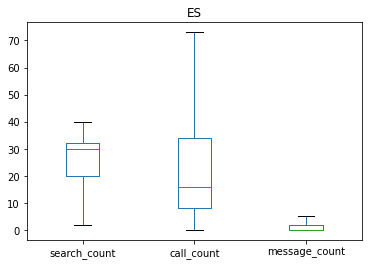

In [43]:
Master[Master['country']=='ES'][['search_count','call_count', 'message_count']].plot.box(showfliers=False).set_title('ES')

Text(0.5, 1.0, 'IT')

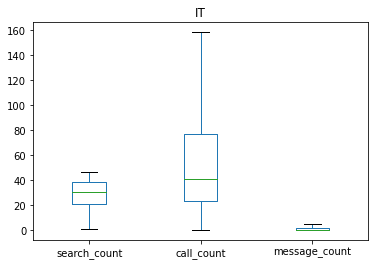

In [44]:
Master[Master['country']=='IT'][['search_count','call_count', 'message_count']].plot.box(showfliers=False).set_title('IT')

Text(0.5, 1.0, 'GB')

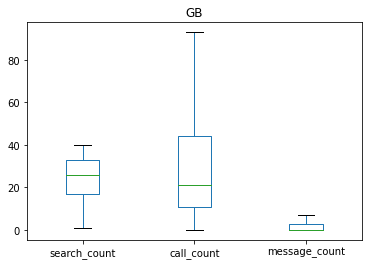

In [45]:
Master[Master['country']=='GB'][['search_count','call_count', 'message_count']].plot.box(showfliers=False).set_title('GB')

Text(0.5, 1.0, 'SE')

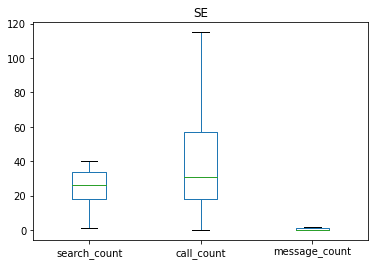

In [46]:
Master[Master['country']=='SE'][['search_count','call_count', 'message_count']].plot.box(showfliers=False).set_title('SE')

Text(0.5, 1.0, 'FR')

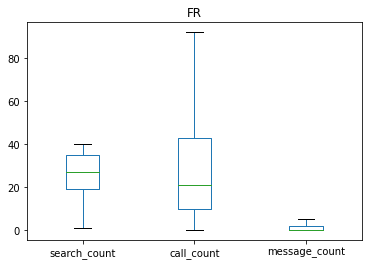

In [47]:
Master[Master['country']=='FR'][['search_count','call_count', 'message_count']].plot.box(showfliers=False).set_title('FR')

### we see that message count is almost the lowest in all of the country and call has the highest range

## Now let's see the country wise analysis of suspected users 

Text(0.5, 1.0, 'IT')

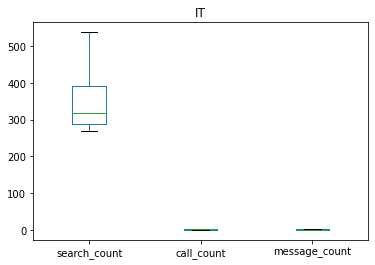

In [48]:
suspectes2[suspectes2.country=='IT'][['search_count','call_count', 'message_count']].plot.box(showfliers=False).set_title('IT')

Text(0.5, 1.0, 'ES')

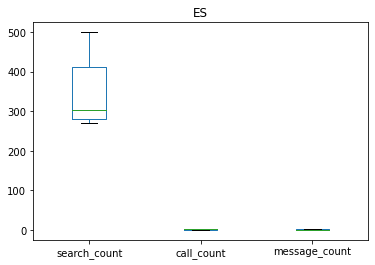

In [49]:
suspectes2[suspectes2.country=='ES'][['search_count','call_count', 'message_count']].plot.box(showfliers=False).set_title('ES')

Text(0.5, 1.0, 'GB')

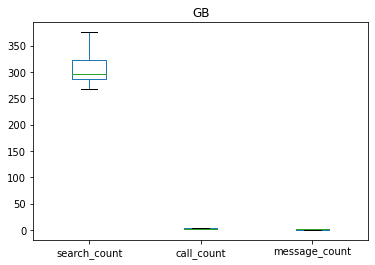

In [50]:
suspectes2[suspectes2.country=='GB'][['search_count','call_count', 'message_count']].plot.box(showfliers=False).set_title('GB')

Text(0.5, 1.0, 'SE')

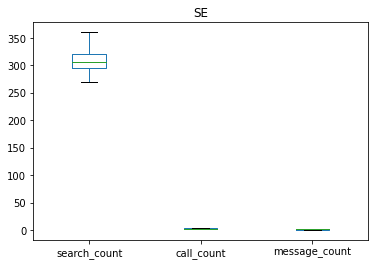

In [51]:
suspectes2[suspectes2.country=='SE'][['search_count','call_count', 'message_count']].plot.box(showfliers=False).set_title('SE')

Text(0.5, 1.0, 'FR')

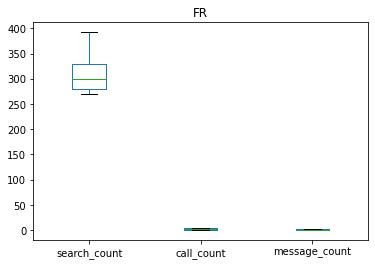

In [52]:
suspectes2[suspectes2.country=='FR'][['search_count','call_count', 'message_count']].plot.box(showfliers=False).set_title('FR')

### Now we can see that the suspected users show the same behaviour i.e search count is much more than that of call or message count

### Let's analyse the data more to draw some more conclusions 

In [53]:
suspectes.sort_values(by=['signup_date'], ascending=False)

,id,country,signup_date,message_count,call_count,search_count
3023,10003023,IT,2019-04-02,0,0,28
18140,10018140,IT,2019-04-02,0,0,22
6595,10006595,ES,2019-04-02,0,0,30
18309,10018309,ES,2019-04-02,0,0,30
5571,10005571,ES,2019-04-02,0,0,30
...,...,...,...,...,...,...
3496,10003496,ES,2019-03-02,0,0,30
6120,10006120,IT,2019-03-02,0,0,22
6635,10006635,ES,2019-03-02,0,0,30
23028,10023028,ES,2019-03-02,0,0,30


In [54]:
suspectes2.sort_values(by=['signup_date'], ascending=False)

,id,country,signup_date,message_count,call_count,search_count,message_normalized,call_normalized,search_normalized,searc2callmessRatio
8491,10008491,SE,2019-04-02,0,3,305,0.00000,0.001785,0.053987,30.250636
14664,10014664,IT,2019-04-02,0,3,313,0.00000,0.001785,0.055408,31.046706
22546,10022546,FR,2019-04-02,1,3,333,0.00051,0.001785,0.058959,25.694865
3815,10003815,GB,2019-04-02,1,1,304,0.00051,0.000595,0.053809,48.703757
23113,10023113,GB,2019-04-02,0,1,302,0.00000,0.000595,0.053454,89.856331
...,...,...,...,...,...,...,...,...,...,...
21783,10021783,IT,2019-03-02,2,2,302,0.00102,0.001190,0.053454,24.191140
22106,10022106,FR,2019-03-02,2,1,343,0.00102,0.000595,0.060735,37.612259
22733,10022733,SE,2019-03-02,1,3,445,0.00051,0.001785,0.078849,34.363012
23157,10023157,GB,2019-03-02,1,3,304,0.00051,0.001785,0.053809,23.450434


### Now I will be analysing suspects2 in details as in suspects dataset there are no calls or messages reveiced so I am assuing all of these id are absolute fraud 

### Now I am finding out the time delay between the signup and 1st message, 1st call and 1st search

#### doing this will help us to see if we might have miscalssified any valid user, as if a bot is deployed then it will start looking for contact details immediately 

In [62]:
def create_delay_frame(suspect2, data_message, data_call, data_search):
    '''
    This function help us find the delay between the first message, call and search
    with respect to the signup date
    '''
    time_list = []
    for i,id in tq(enumerate(suspectes2.id)):
        time_delay = {}
        time_delay['id'] = id
        if suspectes2[suspectes2.id==id]['message_count'].values[0]!=0:
            latest_message_date = \
            data_message[data_message.user_id==id].sort_values(by=['message_ts'])\
            .iloc[0][1]
            
            time_delay['message_delay']=\
            latest_message_date - suspectes2[suspectes2.id==id]\
            ['signup_date'].values[0]
        else:
            time_delay['message_delay'] = 0

        if (suspectes2[suspectes2.id==id]['call_count'].values[0])!=0:
            latest_call_date = data_call[data_call.user_id==id].sort_values(by=['call_ts'])\
            .iloc[0][1]
            time_delay['call_delay'] =\
            latest_call_date - suspectes2[suspectes2.id==id]['signup_date'].values[0]
        else:
            time_delay['call_delay'] = 0

        if (suspectes2[suspectes2.id==id]['search_count'].values[0])!=0:
            latest_search_date =\
            data_search[data_search.user_id==id].sort_values(by=['search_ts']).iloc[0][1]
            time_delay['search_delay'] =\
            latest_search_date - suspectes2[suspectes2.id==id]['signup_date'].values[0]
        else:
            time_delay['search_delay'] = 0


        time_list.append(time_delay)

    return time_list

In [63]:
time_list = create_delay_frame(suspectes2, data_message, data_call, data_search)

500it [00:03, 157.88it/s]


In [64]:
delay_frame = pd.DataFrame(time_list)

In [66]:
delay_frame

,id,message_delay,call_delay,search_delay
0,10000031,1 days 08:22:42.612000,0 days 18:44:33.078000,0 days 09:54:52.738000
1,10000082,0,5 days 09:36:28.588000,0 days 20:01:57.484000
2,10000087,2 days 00:11:52.540000,3 days 13:24:29.691000,0 days 07:55:59.967000
3,10000108,1 days 13:01:58.058000,3 days 07:59:16.277000,0 days 13:37:13.684000
4,10000115,8 days 00:23:21.213000,3 days 13:38:49.048000,0 days 20:18:42.860000
...,...,...,...,...
495,10025825,0 days 08:32:46.337000,7 days 09:27:20.582000,0 days 18:19:11.864000
496,10025844,7 days 23:44:46.715000,5 days 13:33:01.783000,0 days 18:07:19.724000
497,10025909,0,6 days 16:50:34.788000,0 days 10:52:48.366000
498,10025923,6 days 01:32:27.868000,0 days 14:17:40.350000,0 days 09:09:41.100000


In [67]:
newSuspect = suspectes2.merge(delay_frame)

In [68]:
newSuspect

,id,country,signup_date,message_count,call_count,search_count,message_normalized,call_normalized,search_normalized,searc2callmessRatio,message_delay,call_delay,search_delay
0,10000031,SE,2019-03-18,2,3,286,0.00102,0.001785,0.050613,18.046697,1 days 08:22:42.612000,0 days 18:44:33.078000,0 days 09:54:52.738000
1,10000082,GB,2019-03-11,0,3,400,0.00000,0.001785,0.070858,39.703960,0,5 days 09:36:28.588000,0 days 20:01:57.484000
2,10000087,FR,2019-03-13,1,2,273,0.00051,0.001190,0.048304,28.418952,2 days 00:11:52.540000,3 days 13:24:29.691000,0 days 07:55:59.967000
3,10000108,SE,2019-03-15,1,1,306,0.00051,0.000595,0.054164,49.025234,1 days 13:01:58.058000,3 days 07:59:16.277000,0 days 13:37:13.684000
4,10000115,SE,2019-03-05,1,1,383,0.00051,0.000595,0.067839,61.402097,8 days 00:23:21.213000,3 days 13:38:49.048000,0 days 20:18:42.860000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,10025825,IT,2019-03-17,1,3,288,0.00051,0.001785,0.050968,22.212127,0 days 08:32:46.337000,7 days 09:27:20.582000,0 days 18:19:11.864000
496,10025844,SE,2019-03-06,2,1,314,0.00102,0.000595,0.055585,34.422916,7 days 23:44:46.715000,5 days 13:33:01.783000,0 days 18:07:19.724000
497,10025909,IT,2019-03-11,0,2,408,0.00000,0.001190,0.072278,60.750044,0,6 days 16:50:34.788000,0 days 10:52:48.366000
498,10025923,IT,2019-03-02,1,3,373,0.00051,0.001785,0.066063,28.790632,6 days 01:32:27.868000,0 days 14:17:40.350000,0 days 09:09:41.100000


<AxesSubplot:>

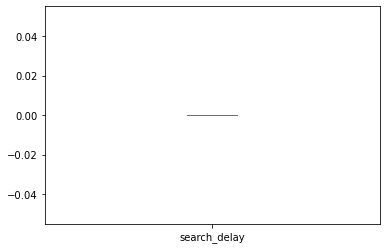

In [69]:
newSuspect.sort_values(by='search_delay')['search_delay'].apply(lambda x:x.days).plot.box(showfliers=False)

In [70]:
newSuspect[newSuspect['search_delay'].apply(lambda x:x.days)!=0]

,id,country,signup_date,message_count,call_count,search_count,message_normalized,call_normalized,search_normalized,searc2callmessRatio,message_delay,call_delay,search_delay
75,10003936,IT,2019-03-08,0,2,630,0.00000,0.001190,0.111703,93.886432,0,3 days 20:06:45.084000,19 days 12:06:38.130000
100,10005127,SE,2019-03-19,0,1,282,0.00000,0.000595,0.049902,83.885811,0,3 days 01:17:06.048000,1 days 15:23:46.829000
125,10006841,GB,2019-03-14,1,1,401,0.00051,0.000595,0.071035,64.295389,1 days 15:47:06.064000,2 days 23:14:08.660000,1 days 09:46:58.153000
150,10008454,IT,2019-03-05,2,2,335,0.00102,0.001190,0.059315,26.843325,2 days 20:07:14.109000,0 days 14:16:58.420000,3 days 09:11:23.355000
192,10010843,IT,2019-03-18,2,3,691,0.00102,0.001785,0.122536,43.692003,0 days 05:20:24.578000,2 days 15:40:49.940000,3 days 14:14:41.229000
258,10014321,SE,2019-03-21,1,2,288,0.00051,0.001190,0.050968,29.986174,3 days 04:15:45.819000,3 days 19:46:39.127000,13 days 13:31:58.387000
292,10015848,FR,2019-04-02,0,3,282,0.00000,0.001785,0.049902,27.961937,0,0 days 14:14:57.719000,1 days 13:42:28.197000
300,10016420,GB,2019-03-08,1,1,1238,0.00051,0.000595,0.219677,198.833491,8 days 04:40:18.996000,5 days 06:34:51.616000,1 days 00:28:26.934000
314,10017065,GB,2019-03-04,0,2,828,0.00000,0.001190,0.146866,123.440508,0,4 days 15:47:04.537000,3 days 22:38:06.862000
335,10018025,GB,2019-04-01,2,3,289,0.00102,0.001785,0.051145,18.236662,0 days 01:40:15.264000,2 days 00:34:32.527000,2 days 10:38:01.773000


### From the above table we can see that these used didn't start searching immediately but if we look at the search count it is quite hard to rule them as legitimate users 

In [71]:
final = pd.DataFrame({'Suspects_id':suspectes2.id.values})

## Now in the suspects dataset we had 1000 suspects but let us take only those users who have search count more than 20 

In [72]:
main_sus = suspectes[suspectes.search_count>20].id.values

In [73]:
final = final.append(pd.DataFrame({'Suspects_id':main_sus}), ignore_index=True)

In [460]:
final.to_csv('final.csv')

# CONCLUSION:
### There are 1228 id found to be of spam nature more details are posted in the blog
### we can use the data from the search and plot the activity of the user w.r.t to time then we can have the activity graph which can help us in the identification of the spammers behaviours